# 심리성향예측AI경진대회

### 데이터 설명(출처: Dacon)

* index
* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
* Qa : Secret
* Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
* Qc : Anyone who completely trusts anyone else is asking for trouble.
* Qd : Secret
* Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
* Qf : There is no excuse for lying to someone else.
* Qg : Secret
* Qh : Most people forget more easily the death of their parents than the loss of their property.
* Qi : Secret
* Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
* Qk : All in all, it is better to be humble and honest than to be important and dishonest.
* QI : Secret
* Qm : It is hard to get ahead without cutting corners here and there.
* Qn : Secret
* Qo : The best way to handle people is to tell them what they want to hear.
* Qp : Secret
* Qq : Most people are basically good and kind.
* Qr : One should take action only when sure it is morally right.
* Qs : It is wise to flatter important people.
* Qt : Secret
* Q_E(a~t) : 질문을 답할 때까지의 시간


* age_group : 연령


* education : 교육 수준- 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


* engnat : 모국어가 영어- 1=Yes, 2=No, 0=무응답


* familysize : 형제자매 수


* gender : 성별- Male, Female


* hand : 필기하는 손- 1=Right, 2=Left, 3=Both, 0=무응답


* married : 혼인 상태- 1=Never married, 2=Currently married, 3=Previously married, 0=Other


* race : 인종- Asian, Arab, Black, Indigenous Australian, Native American, White, Other


* religion : 종교- Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


* tp__(01~07) : items were rated "I see myself as:" _____ such that- tp01 : Extraverted, enthusiastic.- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.- tp04 : Anxious, easily upset. - tp05 : Open to new experiences, complex.- tp06 : Reserved, quiet.- tp07 : Sympathetic, warm.- tp08 : Disorganized, careless.- tp09 : Calm, emotionally stable.- tp10 : Conventional, uncreative.
								
							


#### 순서형 변수
* urban : 유년기의 거주 구역 - 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

* wr_(01~13) : 실존하는 해당 단어의 정의을 앎- 1=Yes, 0=No

* wf_(01~03) : 허구인 단어의 정의를 앎- 1=Yes, 0=No

#### target
* voted (타겟): 지난 해 국가 선거 투표 여부- 1=Yes, 2=No


## 1.Raw Data Modeling

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

from bayes_opt import BayesianOptimization

In [36]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [3]:
# 데이터 불러오기
test = pd.read_csv('/content/test_x.csv')
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


In [4]:
# 데이터 정보 확인
print(train.info())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [5]:
train = train.drop("index", axis=1)
test = test.drop("index", axis=1)

In [6]:
# 인코딩
train = pd.get_dummies(train)
test= pd.get_dummies(test)

In [7]:
data = train.drop('voted',axis=1)
target = train['voted']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.3, random_state=0)

### catboost- 기본모델

In [9]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_val)

Learning rate set to 0.045174
0:	learn: 0.6783163	total: 66.8ms	remaining: 1m 6s
1:	learn: 0.6688292	total: 87.8ms	remaining: 43.8s
2:	learn: 0.6601950	total: 107ms	remaining: 35.4s
3:	learn: 0.6490152	total: 123ms	remaining: 30.6s
4:	learn: 0.6396067	total: 140ms	remaining: 27.9s
5:	learn: 0.6345349	total: 159ms	remaining: 26.3s
6:	learn: 0.6287831	total: 176ms	remaining: 24.9s
7:	learn: 0.6237874	total: 196ms	remaining: 24.3s
8:	learn: 0.6169667	total: 214ms	remaining: 23.6s
9:	learn: 0.6135480	total: 231ms	remaining: 22.9s
10:	learn: 0.6096873	total: 250ms	remaining: 22.4s
11:	learn: 0.6063610	total: 266ms	remaining: 21.9s
12:	learn: 0.6032051	total: 289ms	remaining: 22s
13:	learn: 0.5993647	total: 306ms	remaining: 21.6s
14:	learn: 0.5971266	total: 322ms	remaining: 21.2s
15:	learn: 0.5934370	total: 339ms	remaining: 20.8s
16:	learn: 0.5911429	total: 359ms	remaining: 20.7s
17:	learn: 0.5889149	total: 379ms	remaining: 20.7s
18:	learn: 0.5871517	total: 405ms	remaining: 20.9s
19:	learn: 

In [10]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_preds)))

accuracy:0.6958
precision: 0.6482
recall: 0.7298
roc_auc: 0.6985


In [11]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_train)

Learning rate set to 0.045174
0:	learn: 0.6783163	total: 19.3ms	remaining: 19.3s
1:	learn: 0.6688292	total: 40.9ms	remaining: 20.4s
2:	learn: 0.6601950	total: 60.2ms	remaining: 20s
3:	learn: 0.6490152	total: 77.5ms	remaining: 19.3s
4:	learn: 0.6396067	total: 94.5ms	remaining: 18.8s
5:	learn: 0.6345349	total: 110ms	remaining: 18.3s
6:	learn: 0.6287831	total: 127ms	remaining: 18s
7:	learn: 0.6237874	total: 143ms	remaining: 17.7s
8:	learn: 0.6169667	total: 159ms	remaining: 17.5s
9:	learn: 0.6135480	total: 176ms	remaining: 17.4s
10:	learn: 0.6096873	total: 196ms	remaining: 17.6s
11:	learn: 0.6063610	total: 218ms	remaining: 17.9s
12:	learn: 0.6032051	total: 235ms	remaining: 17.9s
13:	learn: 0.5993647	total: 256ms	remaining: 18s
14:	learn: 0.5971266	total: 273ms	remaining: 17.9s
15:	learn: 0.5934370	total: 289ms	remaining: 17.8s
16:	learn: 0.5911429	total: 306ms	remaining: 17.7s
17:	learn: 0.5889149	total: 322ms	remaining: 17.6s
18:	learn: 0.5871517	total: 343ms	remaining: 17.7s
19:	learn: 0

In [12]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_preds)))

accuracy:0.8179
precision: 0.7662
recall: 0.8589
roc_auc: 0.8215


### catboost- 파라미터 튜닝

In [13]:
import catboost
def catboost_classifier(depth, l2_leaf_reg, num_boost_round):
    params = {
        "loss_function": "Logloss",
        "eval_metric" : "AUC", 
        "depth" : int(depth),
        "l2_leaf_reg" : int(l2_leaf_reg),
        "learning_rate" : 0.01,
        "random_state" : 42,
        "logging_level" : "Silent",
        "thread_count": 24,
        "num_boost_round": int(num_boost_round)
    }
    train_data = catboost.Pool(data=X_train, label=y_train)
    cv_result = catboost.cv(train_data,
                       params,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['test-AUC-mean'].iloc[-1]

In [14]:
catboostBO = BayesianOptimization(catboost_classifier, {
                                                'depth': (1, 4),
                                                'l2_leaf_reg': (2, 30),
                                                'num_boost_round': (100, 1000),
                                                })

catboostBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   depth   | l2_lea... | num_bo... |
-------------------------------------------------------------
|  1        |  0.7522   |  1.028    |  19.06    |  712.3    |
|  2        |  0.7532   |  1.382    |  26.73    |  924.2    |
|  3        |  0.7507   |  3.983    |  28.8     |  100.1    |
|  4        |  0.7531   |  2.049    |  2.447    |  998.7    |
|  5        |  0.7563   |  2.572    |  29.7     |  998.8    |
|  6        |  0.7563   |  2.958    |  29.14    |  999.1    |
|  7        |  0.7614   |  3.453    |  29.14    |  999.7    |
|  8        |  0.7533   |  1.562    |  29.5     |  998.3    |
|  9        |  0.7571   |  3.905    |  2.459    |  356.5    |
|  10       |  0.7575   |  3.786    |  29.86    |  395.5    |
|  11       |  0.7584   |  3.89     |  29.86    |  489.6    |
|  12       |  0.7575   |  3.992    |  29.42    |  392.5    |


In [15]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.365), l2_leaf_reg= int(2.513), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.5))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_train)

In [16]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_param_preds)))

accuracy:0.6951
precision: 0.6395
recall: 0.7447
roc_auc: 0.6994


In [17]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.365), l2_leaf_reg= int(2.513), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.5))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_val)

In [18]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_param_preds)))

accuracy:0.6967
precision: 0.6455
recall: 0.7444
roc_auc: 0.7005


### LightGBM- 기본모델

In [19]:
from lightgbm import LGBMClassifier

In [20]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_val)

In [21]:
lgb_preds

array([2, 2, 2, ..., 1, 1, 1])

In [22]:
#정확도
print('accuracy: {:0.4f}'.format(accuracy_score(y_val, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_preds)))

accuracy: 0.6963
precision: 0.6443
recall: 0.7471
roc_auc: 0.7003


In [23]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_train)

In [24]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_preds)))

accuracy:0.7668
precision: 0.7067
recall: 0.8273
roc_auc: 0.7722


### LightGBM- 파라미터 튜닝

In [26]:
import lightgbm
def lgb_classifier (num_leaves, max_depth, 
                   lambda_l2, lambda_l1, min_child_samples, 
                   min_data_in_leaf):
    params = {"boosting_type": 'gbdt',
              "objective" : "binary",
              "metric" : "auc", 
              "is_unbalance": True,
              "num_leaves" : int(num_leaves),
              "max_depth" : int(max_depth),
              "lambda_l2" : lambda_l2,
              "lambda_l1" : lambda_l1,
              "num_threads" : 20,
              "min_child_samples" : int(min_child_samples),
              "min_data_in_leaf": int(min_data_in_leaf),
              "learning_rate" : 0.01,
              "subsample_freq" : 5,
              "bagging_seed" : 42,
              "verbosity" : -1,
              }
    train_data = lightgbm.Dataset(X_train, y_train)
    cv_result = lightgbm.cv(params,
                       train_data,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['auc-mean'][-1]

In [27]:
lgbBO = BayesianOptimization(lgb_classifier, { 'num_leaves': (25, 4000),
                                                'max_depth': (5, 40),
                                                'lambda_l2': (0.0, 0.1),
                                                'lambda_l1': (0.0, 0.1),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=15, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  1.0      |  0.01652  |  0.0602   |  38.81    |  2.681e+0 |  1.093e+0 |  766.2    |
|  2        |  1.0      |  0.02297  |  0.003702 |  38.75    |  9.099e+0 |  1.342e+0 |  906.7    |
|  3        |  1.0      |  0.01858  |  0.04994  |  36.93    |  552.5    |  1.938e+0 |  3.971e+0 |
|  4        |  1.0      |  0.01978  |  0.07063  |  25.86    |  9.792e+0 |  118.5    |  3.884e+0 |
|  5        |  1.0      |  0.03499  |  0.06397  |  27.41    |  216.0    |  139.2    |  3.782e+0 |
|  6        |  1.0      |  0.05625  |  0.02641  |  34.99    |  353.4    |  120.5    |  2.771e+0 |
|  7        |  1.0      |  0.04     |  0.02234  |  14.23    |  350.2    |  1.872e+0 |  30.78    |
|  8        |  1.0      |  0.004945 |  0.0721   |  37.56    |  9.987e+0 |  1.972e+0 |  3.874e+0 |
|  9        |  1.0  

In [29]:
lgb_param = LGBMClassifier(num_leaves=int(3.867e+0), max_depth=int(20.51),lambda_l2=0.09738,lambda_l1=0.03378,min_child_samples=int(348.5),
                           min_data_in_leaf=int(254.8), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_train)

In [30]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_param_preds)))

accuracy:0.6605
precision: 0.5812
recall: 0.8885
roc_auc: 0.6805


In [31]:
lgb_param = LGBMClassifier(num_leaves=int(3.867e+0), max_depth=int(20.51),lambda_l2=0.09738,lambda_l1=0.03378,min_child_samples=int(348.5),
                           min_data_in_leaf=int(254.8), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_val)

In [32]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_param_preds)))

accuracy:0.6714
precision: 0.5938
recall: 0.8865
roc_auc: 0.6886


## 2.EDA

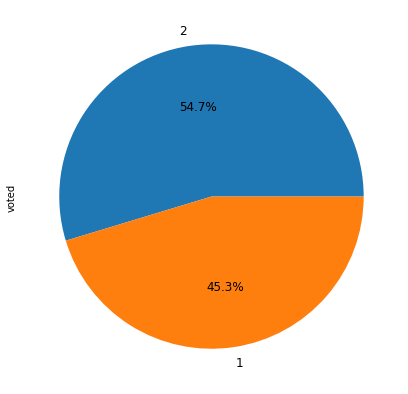

In [33]:
f, ax = plt.subplots(figsize=(7, 7))
train['voted'].value_counts().plot.pie(ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

* 타깃변수 확인: 1- YES, 2- No
* 타겟 데이터의 불균형 발견되지 않음

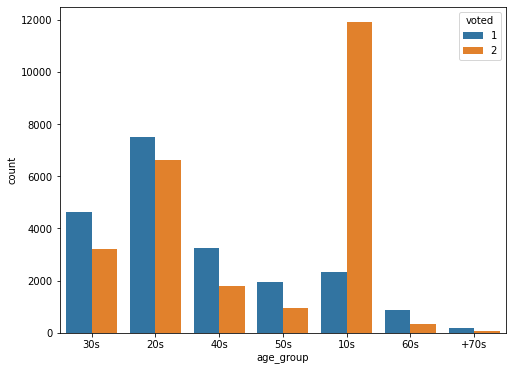

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group', hue = train['voted'])

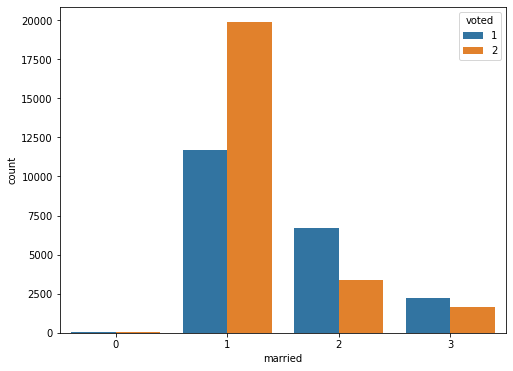

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'married', hue = train['voted'])

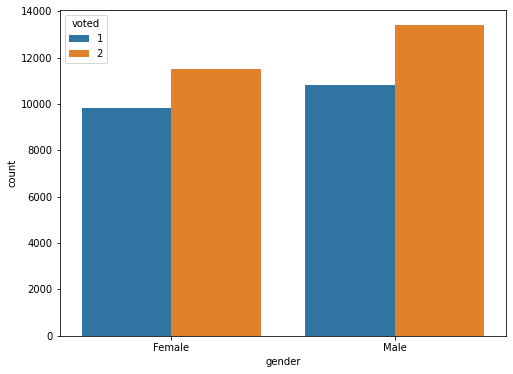

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender', hue = train['voted'])

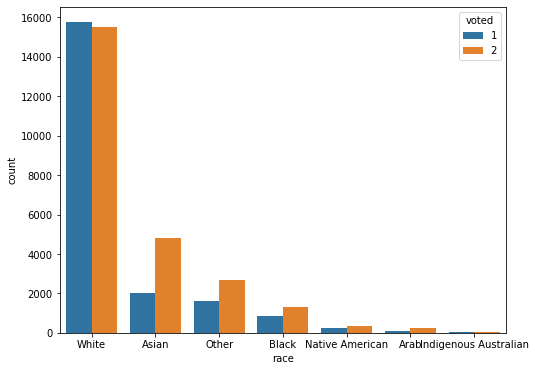

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'race', hue = train['voted'])

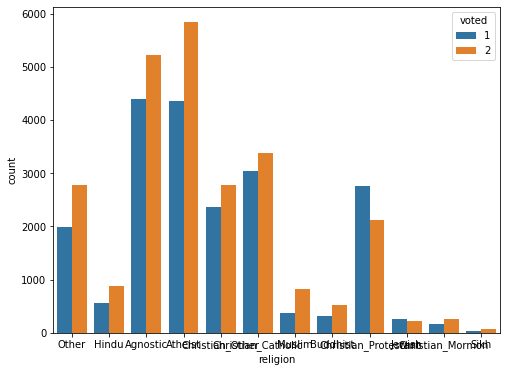

In [41]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'religion', hue = train['voted'])

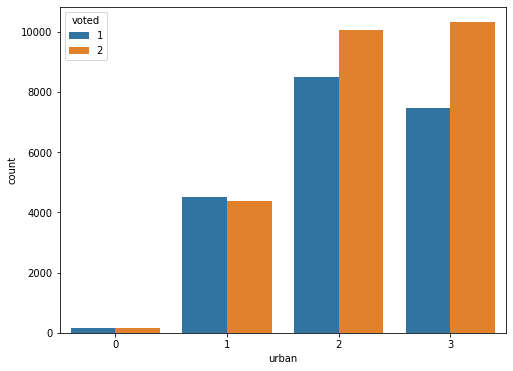

In [42]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'urban', hue = train['voted'])

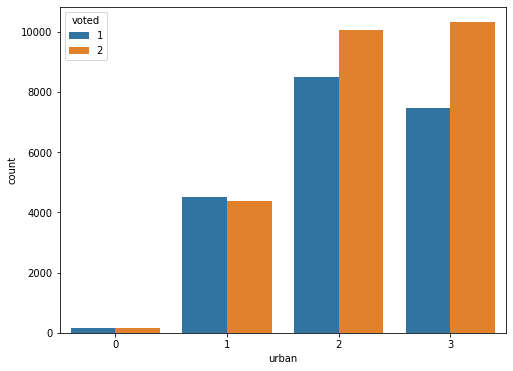

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'urban', hue = train['voted'])

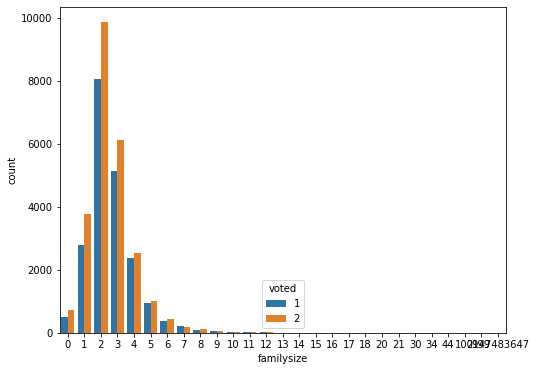

In [44]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'familysize', hue = train['voted'])

## 3.Feature Engineering

#### 파생변수1:마키아벨리니즘 점수 계산 

In [45]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [46]:
for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [47]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

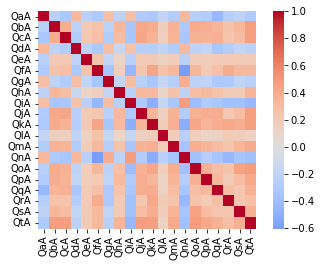

In [48]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [49]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]

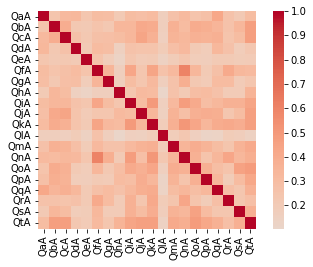

In [50]:
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [51]:
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00


In [52]:
train[['Mach_score']].describe()

,Mach_score
count,45532.000000
mean,3.352474
std,0.794661
min,1.000000
25%,2.750000
50%,3.350000
75%,3.950000
max,5.000000


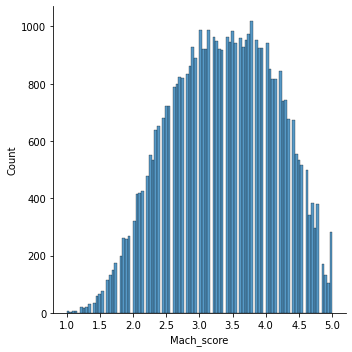

In [54]:
sns.displot(train, x="Mach_score", bins=100)

In [55]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

test['Mach_score'] = test[Answers].mean(axis = 1)

#### 이상치 제거

In [56]:
# familysize 이상치 제거
train= train[train['familysize'] < 30]
print('이상치 제거 후:',train.shape)

이상치 제거 후: (45524, 79)


#### 불필요한 변수 삭제

In [57]:
drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'hand']

#### 파생변수2: wr개수

* wr_(01~13) : 실존하는 해당 단어의 정의을 앎 1=Yes, 0=No
* wf_(01~03) : 허구인 단어의 정의를 앎 1=Yes, 0=No


#### 파생변수3: tp 분류
* tp__(01~07) : items were rated "I see myself as:" _____ such that
* tp01 : Extraverted, enthusiastic.
* tp02 : Critical, quarrelsome.
* tp03 : Dependable, self-disciplined.
* tp04 : Anxious, easily upset.
* tp05 : Open to new experiences, complex.
* tp06 : Reserved, quiet.
* tp07 : Sympathetic, warm.
* tp08 : Disorganized, careless.
* tp09 : Calm, emotionally stable.
* tp10 : Conventional, uncreative.

## 4.Modeling 최종

### catboost- 전처리 후 기본모델 

In [58]:
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_val)

Learning rate set to 0.045174
0:	learn: 0.6783163	total: 19.9ms	remaining: 19.9s
1:	learn: 0.6688292	total: 40.5ms	remaining: 20.2s
2:	learn: 0.6601950	total: 58.4ms	remaining: 19.4s
3:	learn: 0.6490152	total: 75.5ms	remaining: 18.8s
4:	learn: 0.6396067	total: 92.4ms	remaining: 18.4s
5:	learn: 0.6345349	total: 108ms	remaining: 17.9s
6:	learn: 0.6287831	total: 125ms	remaining: 17.8s
7:	learn: 0.6237874	total: 144ms	remaining: 17.8s
8:	learn: 0.6169667	total: 161ms	remaining: 17.7s
9:	learn: 0.6135480	total: 179ms	remaining: 17.7s
10:	learn: 0.6096873	total: 200ms	remaining: 18s
11:	learn: 0.6063610	total: 217ms	remaining: 17.9s
12:	learn: 0.6032051	total: 236ms	remaining: 17.9s
13:	learn: 0.5993647	total: 253ms	remaining: 17.8s
14:	learn: 0.5971266	total: 274ms	remaining: 18s
15:	learn: 0.5934370	total: 291ms	remaining: 17.9s
16:	learn: 0.5911429	total: 308ms	remaining: 17.8s
17:	learn: 0.5889149	total: 324ms	remaining: 17.7s
18:	learn: 0.5871517	total: 342ms	remaining: 17.6s
19:	learn:

In [59]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_preds)))

accuracy:0.6958
precision: 0.6482
recall: 0.7298
roc_auc: 0.6985


In [60]:
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_train)

Learning rate set to 0.045174
0:	learn: 0.6783163	total: 17.2ms	remaining: 17.2s
1:	learn: 0.6688292	total: 39ms	remaining: 19.5s
2:	learn: 0.6601950	total: 57.3ms	remaining: 19.1s
3:	learn: 0.6490152	total: 75.6ms	remaining: 18.8s
4:	learn: 0.6396067	total: 93.8ms	remaining: 18.7s
5:	learn: 0.6345349	total: 111ms	remaining: 18.3s
6:	learn: 0.6287831	total: 128ms	remaining: 18.1s
7:	learn: 0.6237874	total: 145ms	remaining: 18s
8:	learn: 0.6169667	total: 163ms	remaining: 18s
9:	learn: 0.6135480	total: 184ms	remaining: 18.2s
10:	learn: 0.6096873	total: 206ms	remaining: 18.5s
11:	learn: 0.6063610	total: 223ms	remaining: 18.3s
12:	learn: 0.6032051	total: 244ms	remaining: 18.5s
13:	learn: 0.5993647	total: 261ms	remaining: 18.4s
14:	learn: 0.5971266	total: 277ms	remaining: 18.2s
15:	learn: 0.5934370	total: 295ms	remaining: 18.1s
16:	learn: 0.5911429	total: 315ms	remaining: 18.2s
17:	learn: 0.5889149	total: 334ms	remaining: 18.2s
18:	learn: 0.5871517	total: 352ms	remaining: 18.2s
19:	learn: 0

In [61]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_preds)))

accuracy:0.8179
precision: 0.7662
recall: 0.8589
roc_auc: 0.8215


### catboost- 전처리 후 파라미터 튜닝 

In [62]:
def catboost_classifier(depth, l2_leaf_reg, num_boost_round):
    params = {
        "loss_function": "Logloss",
        "eval_metric" : "AUC", 
        "depth" : int(depth),
        "l2_leaf_reg" : int(l2_leaf_reg),
        "learning_rate" : 0.01,
        "random_state" : 42,
        "logging_level" : "Silent",
        "thread_count": 24,
        "num_boost_round": int(num_boost_round)
    }
    train_data = catboost.Pool(data=X_train, label=y_train)
    cv_result = catboost.cv(train_data,
                       params,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['test-AUC-mean'].iloc[-1]

In [63]:
catboostBO = BayesianOptimization(catboost_classifier, {
                                                'depth': (1, 4),
                                                'l2_leaf_reg': (2, 30),
                                                'num_boost_round': (100, 1000),
                                                })

catboostBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   depth   | l2_lea... | num_bo... |
-------------------------------------------------------------
|  1        |  0.7609   |  3.515    |  9.416    |  867.4    |
|  2        |  0.7528   |  2.952    |  21.02    |  865.4    |
|  3        |  0.7539   |  4.0      |  2.0      |  100.0    |
|  4        |  0.7504   |  1.552    |  2.068    |  494.1    |
|  5        |  0.7615   |  3.493    |  2.373    |  999.9    |
|  6        |  0.7527   |  1.335    |  2.021    |  852.4    |
|  7        |  0.7503   |  1.791    |  16.73    |  479.8    |
|  8        |  0.7505   |  2.914    |  2.43     |  282.9    |
|  9        |  0.7516   |  3.111    |  29.98    |  102.2    |
|  10       |  0.7558   |  2.607    |  3.789    |  999.7    |
|  11       |  0.7598   |  3.979    |  26.49    |  639.7    |
|  12       |  0.7613   |  3.894    |  2.586    |  948.6    |


In [71]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.493), l2_leaf_reg= int(2.373), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.9))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_train)

In [72]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_param_preds)))

accuracy:0.6951
precision: 0.6395
recall: 0.7447
roc_auc: 0.6994


In [73]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.493), l2_leaf_reg= int(2.373), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.9))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_val)

In [74]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_param_preds)))

accuracy:0.6967
precision: 0.6455
recall: 0.7444
roc_auc: 0.7005


### LightGBM- 전처리 후 기본모델 

In [64]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_val)

In [65]:
#정확도
print('accuracy: {:0.4f}'.format(accuracy_score(y_val, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_preds)))

accuracy: 0.6963
precision: 0.6443
recall: 0.7471
roc_auc: 0.7003


In [66]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_train)

In [67]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_preds)))

accuracy:0.7668
precision: 0.7067
recall: 0.8273
roc_auc: 0.7722


### LightGBM- 전처리 후 파라미터 튜닝

In [69]:
def lgb_classifier (num_leaves, max_depth, 
                   lambda_l2, lambda_l1, min_child_samples, 
                   min_data_in_leaf):
    params = {"boosting_type": 'gbdt',
              "objective" : "binary",
              "metric" : "auc", 
              "is_unbalance": True,
              "num_leaves" : int(num_leaves),
              "max_depth" : int(max_depth),
              "lambda_l2" : lambda_l2,
              "lambda_l1" : lambda_l1,
              "num_threads" : 20,
              "min_child_samples" : int(min_child_samples),
              "min_data_in_leaf": int(min_data_in_leaf),
              "learning_rate" : 0.01,
              "subsample_freq" : 5,
              "bagging_seed" : 42,
              "verbosity" : -1,
              }
    train_data = lightgbm.Dataset(X_train, y_train)
    cv_result = lightgbm.cv(params,
                       train_data,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['auc-mean'][-1]

In [70]:
lgbBO = BayesianOptimization(lgb_classifier, { 'num_leaves': (25, 4000),
                                                'max_depth': (5, 40),
                                                'lambda_l2': (0.0, 0.1),
                                                'lambda_l1': (0.0, 0.1),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=15, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  1.0      |  0.02804  |  0.06364  |  25.9     |  7.128e+0 |  638.6    |  2.094e+0 |
|  2        |  1.0      |  0.01357  |  0.09415  |  19.59    |  5.551e+0 |  1.563e+0 |  876.9    |
|  3        |  1.0      |  0.09901  |  0.002451 |  25.55    |  208.5    |  112.8    |  3.87e+03 |
|  4        |  1.0      |  0.03613  |  0.04822  |  36.87    |  8.269e+0 |  484.1    |  2.088e+0 |
|  5        |  1.0      |  0.02957  |  0.07133  |  21.78    |  9.534e+0 |  1.909e+0 |  3.971e+0 |
|  6        |  1.0      |  0.08779  |  0.08262  |  9.66     |  368.1    |  213.1    |  90.65    |
|  7        |  1.0      |  0.02618  |  0.06069  |  12.98    |  9.999e+0 |  1.93e+03 |  155.1    |
|  8        |  1.0      |  0.07899  |  0.06195  |  33.72    |  62.83    |  1.985e+0 |  3.737e+0 |
|  9        |  1.0  

In [75]:
lgb_param = LGBMClassifier(num_leaves=int(203.4), max_depth=int(8.549),lambda_l2=0.02267,lambda_l1=0.08113,min_child_samples=int(9.562e+0),
                           min_data_in_leaf=int(862.4), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_train)

In [76]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_param_preds)))

accuracy:0.6899
precision: 0.6249
recall: 0.7843
roc_auc: 0.6982


In [77]:
lgb_param = LGBMClassifier(num_leaves=int(203.4), max_depth=int(8.549),lambda_l2=0.02267,lambda_l1=0.08113,min_child_samples=int(9.562e+0),
                           min_data_in_leaf=int(862.4), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_val)

In [78]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_param_preds)))

accuracy:0.6968
precision: 0.6365
recall: 0.7827
roc_auc: 0.7037
